<a href="https://colab.research.google.com/github/StefTse/AIDL_xrcises/blob/main/AIDL_03_Lab_7_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### University of West Attica
## MSc in Artificial Intelligence & Deep Learning

# AIDL03 - Platforms for AI and Python programming

### G. Nikolaou 
### nikolaou@uniwa.gr

<br>
<br>

# K-Nearest Neigbors Algorithm
##  Iris Dataset

<br>
<br>

### **Importing necessary libraries**

In [69]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

<br>

#  Import and Understand your Dataset

<br>

## Data Import and Exploration

#### Importing csv filetype

In [70]:
data=pd.read_csv('/content/Iris_Data.csv')

### Data Exploration

Use Pandas and visualization libraries to explore your dataset. Get insights that will help you during modeling.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [72]:
data.isnull().sum() #checking for total null values


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [73]:
data.groupby('species').size()


species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [74]:
data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
data.groupby(['sepal_length','sepal_width','petal_length', 'petal_width'])['species'].count()

sepal_length  sepal_width  petal_length  petal_width
4.3           3.0          1.1           0.1            1
4.4           2.9          1.4           0.2            1
              3.0          1.3           0.2            1
              3.2          1.3           0.2            1
4.5           2.3          1.3           0.3            1
                                                       ..
7.7           2.6          6.9           2.3            1
              2.8          6.7           2.0            1
              3.0          6.1           2.3            1
              3.8          6.7           2.2            1
7.9           3.8          6.4           2.0            1
Name: species, Length: 147, dtype: int64

Text(0.5, 1.0, 'Species to petal_length')

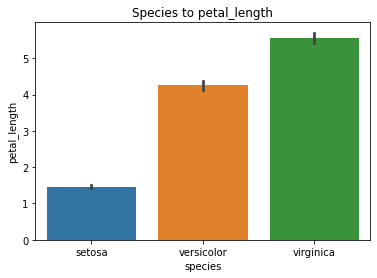

In [76]:
sns.barplot(x = "species",y = "petal_length",data=data) 
plt.title('Species to petal_length')

<br>
<br>

# Splitting data in training and test datasets

Inputs are assigned to variable `Χ` and outputs to `y`

In [77]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= data['species']

Library Scikit-learn has a method named ``train_test_split`` for the purpose of splitting data in training and test subsets

In [78]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=7)

print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)

print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (112, 4)
y_train size: (112,)
X_test size: (38, 4)
y_test size: (38,)


<br>
<br>

# Create a Machine Learning Model

In  **scikit-learn** library, a model (estimator) for classification is a Python object with the following methods
- `fit(X, y)` for model training using input data `Χ` and output `y` (here we use X_train, y_train)
- `predict(y_test)` to use the model for the classification of previously unseen by the model data (y_test) 


Following are the basic steps for the development and use of machine learning models




---
### 1. Import class of models from scikit-learn library 



In [79]:
from sklearn.neighbors import KNeighborsClassifier



---




### 2. Define model (create instance of the class), select specific algorithm and its hyperparameters


In [80]:
knnClass = KNeighborsClassifier(n_neighbors=7)



---


### 3. Train model

In [81]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)



---




### 4. Evaluate model performance using test data


In [82]:
y_pred = knnClass.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
accuracy_score(y_test, y_pred)

Accuracy Score:


0.9210526315789473

---
### 5.Use trained model to classify a new iris flower using its measurements of the four features 

New flower data

In [84]:
neoDeigma = np.array([[4.7, 1.9, 1.5, 0.7]])

Use trained model

In [85]:
prediction = knnClass.predict(neoDeigma)
print("New flower is of Class:", prediction)


New flower is of Class: ['setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


---
---
## Exercises


---
1. Write a code that plots the relationship between the number of K neighbors to the accuracy of the model for values K=1 to K=20

2. For the `Iris dataset` compare the performance of the best KNN model with that of Decision Tree model from Lab 6

3. Develop Classification models using Decision Trees and KNN for the `Diabetes dataset`


Text(0, 0.5, 'Accuracy')

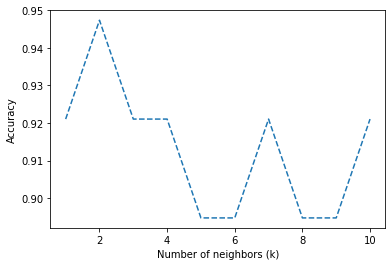

In [86]:
acc=[]
k=[]
for i in range(10):
  k.append(1+i)
  knnClass = KNeighborsClassifier(n_neighbors=1+i)
  knnClass.fit(X_train, y_train)
  y_pred = knnClass.predict(X_test)
  a_s=accuracy_score(y_test, y_pred)
  acc.append(a_s)


plt.plot(k, acc, '--',label='')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')



In [87]:
#best K-NN model: k=2
KnnClass_2= KNeighborsClassifier(n_neighbors=2)



In [88]:
KnnClass_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [89]:
y_pred_KnnClass_2=KnnClass_2.predict(X_test)

In [90]:
Knn_2_accu=accuracy_score(y_test, y_pred_KnnClass_2)
print('Accuracy of best K-NN model (k=2):', Knn_2_accu)


Accuracy of best K-NN model (k=2): 0.9473684210526315


In [91]:
from sklearn import tree

In [120]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
tree.DecisionTreeClassifier

In [93]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [94]:
y_pred_dtree=dtree.predict(X_test)

In [95]:
dtree_accuracy=accuracy_score(y_test,y_pred_dtree)
print('Accuracy of dtree model:', dtree_accuracy)

Accuracy of dtree model: 0.8947368421052632


In [96]:
print('K-NN (k=2) accuracy:', round(Knn_2_accu*100, 2),'%')
print('Dtree (entropy) accuracy:', round(dtree_accuracy*100, 2),'%')

K-NN (k=2) accuracy: 94.74 %
Dtree (entropy) accuracy: 89.47 %


Develop Classification models using Decision Trees and KNN for the Diabetes dataset

In [97]:
diab_df=pd.read_csv('/diabetes.csv')

In [98]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
Xd= diab_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']]
yd=diab_df['Outcome']

In [118]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.25, random_state=7)

print("Xd_train size:", Xd_train.shape)
print("yd_train size:", yd_train.shape)

print("Xd_test size:", Xd_test.shape)
print("yd_test size:", yd_test.shape)

Xd_train size: (576, 8)
yd_train size: (576,)
Xd_test size: (192, 8)
yd_test size: (192,)



###Tree models


In [121]:
dtree_1 = tree.DecisionTreeClassifier(criterion='entropy')
dtree_2 = tree.DecisionTreeClassifier(criterion='gini')

In [123]:
dtree_1.fit(Xd_train, yd_train)
dtree_2.fit(Xd_train, yd_train)

DecisionTreeClassifier()

In [124]:
y_pred_tr1 = dtree_1.predict(Xd_test)
y_pred_tr2 = dtree_2.predict(Xd_test)

In [145]:
print("Accuracy Score tree_1:", round(accuracy_score(yd_test, y_pred_tr1),2))
print("Accuracy Score tree_2:", round(accuracy_score(yd_test, y_pred_tr2),2))


Accuracy Score tree_1: 0.76
Accuracy Score tree_2: 0.73


###K-NN models

In [146]:

for i in range(20):

  knn = KNeighborsClassifier(n_neighbors=1+i)
  knn.fit(Xd_train, yd_train)
  y_pred_knn = knn.predict(Xd_test)

  print('for k =',i+1, "model's accuracy score is:", round(accuracy_score(yd_test, y_pred_knn),2))


for k = 1 model's accuracy score is: 0.62
for k = 2 model's accuracy score is: 0.68
for k = 3 model's accuracy score is: 0.67
for k = 4 model's accuracy score is: 0.71
for k = 5 model's accuracy score is: 0.72
for k = 6 model's accuracy score is: 0.72
for k = 7 model's accuracy score is: 0.73
for k = 8 model's accuracy score is: 0.75
for k = 9 model's accuracy score is: 0.72
for k = 10 model's accuracy score is: 0.73
for k = 11 model's accuracy score is: 0.72
for k = 12 model's accuracy score is: 0.76
for k = 13 model's accuracy score is: 0.76
for k = 14 model's accuracy score is: 0.76
for k = 15 model's accuracy score is: 0.77
for k = 16 model's accuracy score is: 0.76
for k = 17 model's accuracy score is: 0.77
for k = 18 model's accuracy score is: 0.78
for k = 19 model's accuracy score is: 0.77
for k = 20 model's accuracy score is: 0.76
